In [22]:
from sklearn import datasets
import pandas as pd

In [23]:
# Importar base
iris = datasets.load_iris()

In [24]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df['target'] = iris['target']
iris_df["target_name"] = pd.Categorical.from_codes(iris_df["target"], iris["target_names"])

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [26]:
X = iris_df.drop(columns=["target_name", "target"])
Y = iris_df[["target"]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [28]:
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (105, 4)
Shape y_train: (105, 1)
Shape X_test: (45, 4)
Shape y_test: (45, 1)


In [29]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print(f"Acurácia: {accuracy_score(y_test, y_pred)*100}%")

Acurácia: 84.44444444444444%


## Visualização - Descision Tree

In [32]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

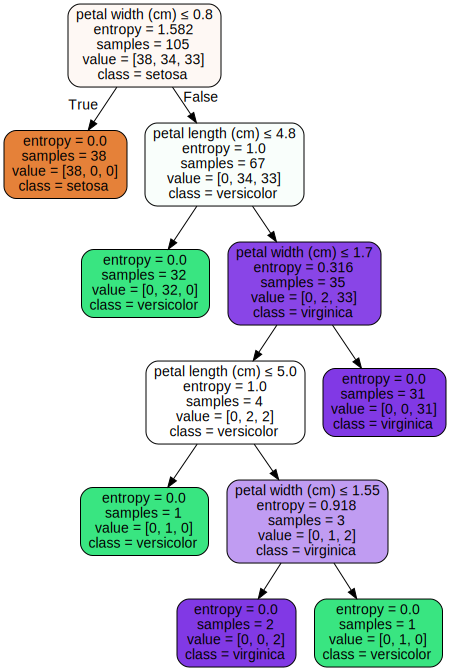

In [ ]:
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
#!pip install dtreeviz==1.2

In [ ]:
from dtreeviz.trees import *
viz = dtreeviz(clf, 
               X_train.values, 
               y_train["target"].values,
               target_name='target',
               feature_names=X_train.columns, 
               class_names=["setosa", "versicolor", "virginica"],
               histtype= 'barstacked')  
              


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


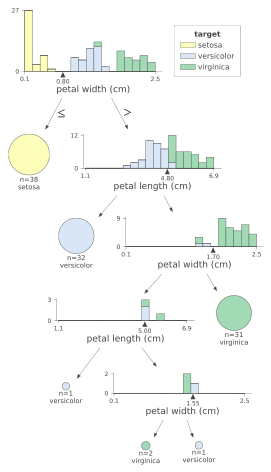

In [ ]:
viz

In [ ]:
viz_pred = dtreeviz(clf,
        X_train.values, 
        y_train["target"].values, 
        target_name='variety', 
        orientation ='TD',  
        feature_names=X_train.columns,
        X=X_test.iloc[[3]].values[0], # Single observation for prediction
        class_names=["setosa", "versicolor", "virginica"],
        show_just_path=True     
        )

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


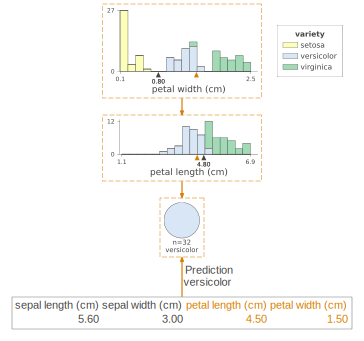

In [ ]:
viz_pred